In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap
from google.colab import files
import io

In [ ]:
# Upload dataset
print("Please upload your file:")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print(f"Loading dataset: {filename}")
datasets = pd.read_csv(io.BytesIO(uploaded[filename]))
print(f"Dataset shape: {datasets.shape}")
print("First 5 rows:")
print(datasets.head())

Please upload your file:


Saving Social_Network_Ads.csv to Social_Network_Ads.csv
Loading dataset: Social_Network_Ads.csv
Dataset shape: (400, 5)
First 5 rows:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
# Prepare features and target
print("Preparing features and target variables...")
X = datasets.iloc[:, [2,3]].values
Y = datasets.iloc[:, 4].values
print(f"Features shape: {X.shape}")
print(f"Target shape: {Y.shape}")

Preparing features and target variables...
Features shape: (400, 2)
Target shape: (400,)


In [ ]:
# Split into train and test sets
print("Splitting into training and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(f"Training samples: {len(X_train)}")
print(f"Test samples: {len(X_test)}")

Splitting into training and test sets...
Training samples: 300
Test samples: 100


In [ ]:
# Feature scaling
print("Applying feature scaling...")
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Fit Logistic Regression model
print("Training Logistic Regression model...")
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)
print("Model training complete!")

Applying feature scaling...
Training Logistic Regression model...
Model training complete!


In [ ]:
# Predict test set results
print("Predicting test set results...")
Y_pred = classifier.predict(X_test)

# Confusion matrix and accuracy
print("Confusion Matrix:")
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")

Predicting test set results...
Confusion Matrix:
[[65  3]
 [ 8 24]]
Accuracy: 89.00%


Visualizing training set results...


/tmp/ipython-input-2523281182.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],


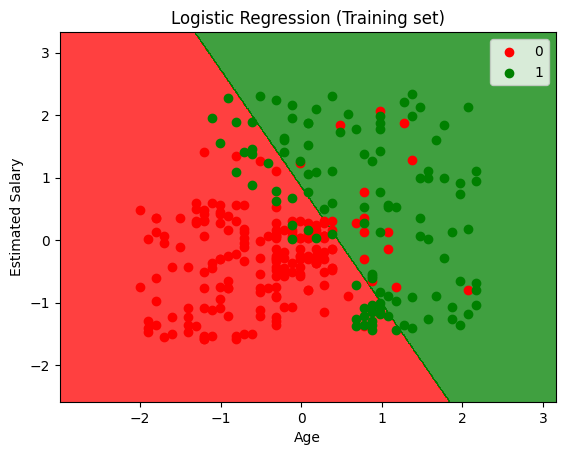

In [ ]:
# Visualizing the Training set results
print("Visualizing training set results...")
X_set, Y_set = X_train, Y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:,0].min() -1, stop=X_set[:,0].max() +1, step=0.01),
    np.arange(start=X_set[:,1].min() -1, stop=X_set[:,1].max() +1, step=0.01))

plt.contourf(
    X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75, cmap=ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()